In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime 
import os
import sys
import time

%matplotlib inline

In [3]:
BASE_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'
DOWNLOAD_DIR = 'COVID-19/'
CONFIRMED_PATH = 'time_series_covid19_confirmed_global.csv'
RECOVERED_PATH = 'time_series_covid19_recovered_global.csv'
DEATHS_PATH = 'time_series_covid19_deaths_global.csv'

In [4]:
if not os.path.isdir('COVID-19'):
    os.mkdir('COVID-19')

In [7]:
!wget -L $BASE_URL$CONFIRMED_PATH -O $DOWNLOAD_DIR$CONFIRMED_PATH
!wget -L $BASE_URL$RECOVERED_PATH -O $DOWNLOAD_DIR$RECOVERED_PATH
!wget -L $BASE_URL$DEATHS_PATH -O $DOWNLOAD_DIR$DEATHS_PATH

--2020-08-05 18:06:37--  https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Risoluzione di raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.240.133
Connessione a raw.githubusercontent.com (raw.githubusercontent.com)|151.101.240.133|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 200 OK
Lunghezza: 205411 (201K) [text/plain]
Salvataggio in: "COVID-19/time_series_covid19_confirmed_global.csv"

COVID-19/time_serie 100%[===================>] 200,60K   711KB/s    in 0,3s    

2020-08-05 18:06:39 (711 KB/s) - "COVID-19/time_series_covid19_confirmed_global.csv" salvato [205411/205411]

--2020-08-05 18:06:39--  https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv
Risoluzione di raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.240.133
Connessione a ra

In [8]:
confirmed_df = pd.read_csv(os.path.join(DOWNLOAD_DIR, CONFIRMED_PATH))
deaths_df = pd.read_csv(os.path.join(DOWNLOAD_DIR, DEATHS_PATH))
recovered_df = pd.read_csv(os.path.join(DOWNLOAD_DIR, RECOVERED_PATH))

In [9]:
confirmed_df.head(3)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,36157,36263,36368,36471,36542,36675,36710,36710,36747,36782
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,4763,4880,4997,5105,5197,5276,5396,5519,5620,5750
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,27357,27973,28615,29229,29831,30394,30950,31465,31972,32504


In [10]:
deaths_df.head(3)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1259,1269,1270,1271,1271,1272,1283,1284,1288,1288
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,138,144,148,150,154,157,161,166,172,176
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,1155,1163,1174,1186,1200,1210,1223,1231,1239,1248


In [11]:
recovered_df.head(3)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,25180,25198,25358,25389,25471,25509,25509,25510,25669,25669
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2682,2745,2789,2830,2883,2952,2961,3018,3031,3031
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,18088,18837,19233,19592,20082,20537,20988,21419,21901,22375


In [12]:
confirmed_trials = confirmed_df.copy()
confirmed_trials.shape

(266, 200)

In [13]:
drop_columns = confirmed_trials.columns.values[4:]
new_rows = []

for index, row in confirmed_trials.iterrows():
    for i, ind in enumerate(row.index[4:]):       
        my_dict = {}
        my_dict['Province/State'] = row['Province/State']
        my_dict['Country/Region'] = row['Country/Region']
        my_dict['Lat'] = row['Lat']
        my_dict['Long'] = row['Long']
        my_dict['Date'] = datetime.strptime(ind, '%m/%d/%y')
        my_dict['ConfirmedCases'] = row.iloc[i+4]
        my_dict['Fatalities'] = deaths_df[deaths_df['Country/Region'] == row['Country/Region']].iloc[0, i+4]
        my_dict['Recovered'] = recovered_df[recovered_df['Country/Region'] == row['Country/Region']].iloc[0, i+4]
        new_rows.append(my_dict)
        
confirmed_global_df = pd.DataFrame(new_rows)

In [14]:
confirmed_global_df[confirmed_global_df['Country/Region'] == 'Italy']

,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities,Recovered
26852,NaN,Italy,41.87194,12.56738,2020-01-22,0,0,0
26853,NaN,Italy,41.87194,12.56738,2020-01-23,0,0,0
26854,NaN,Italy,41.87194,12.56738,2020-01-24,0,0,0
26855,NaN,Italy,41.87194,12.56738,2020-01-25,0,0,0
26856,NaN,Italy,41.87194,12.56738,2020-01-26,0,0,0
...,...,...,...,...,...,...,...,...
27043,NaN,Italy,41.87194,12.56738,2020-07-31,247537,35141,199974
27044,NaN,Italy,41.87194,12.56738,2020-08-01,247832,35146,200229
27045,NaN,Italy,41.87194,12.56738,2020-08-02,248070,35154,200460
27046,NaN,Italy,41.87194,12.56738,2020-08-03,248229,35166,200589


In [15]:
confirmed_global_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52136 entries, 0 to 52135
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  15876 non-null  object        
 1   Country/Region  52136 non-null  object        
 2   Lat             52136 non-null  float64       
 3   Long            52136 non-null  float64       
 4   Date            52136 non-null  datetime64[ns]
 5   ConfirmedCases  52136 non-null  int64         
 6   Fatalities      52136 non-null  int64         
 7   Recovered       52136 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 3.2+ MB


In [16]:
def data_per_country(country, df):
    df_progress = df[df['Country/Region'] == country].loc[:, ["Date", "ConfirmedCases", "Fatalities"]].groupby(['Date'], as_index=False).sum()    
    if len(df_progress) != 0:
        return df_progress
    else:        
        return None
    
def plot_progress_data(countries_list, dataframe, data_to_show='confirmed'):
    plot_list = []
    
    data_type_string = "ConfirmedCases" if data_to_show is 'confirmed' else 'Fatalities'
    
    for country in countries_list:
        df = data_per_country(country, dataframe)
        if df is None:
            continue
        df = df.loc[:, ['Date', data_type_string]]        
        plt.plot(df.iloc[-35:,0], df.iloc[-35:,1])
    
    plt.xlabel("Date")
    plt.ylabel("Confirmed cases")
    plt.title("Covid-19 progression")
    plt.grid(True)
    plt.legend(countries)
    _ = plt.xticks(rotation=270, fontsize = 10)

<>:11: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:11: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-16-4e1eca37a1a7>:11: SyntaxWarning: "is" with a literal. Did you mean "=="?
  data_type_string = "ConfirmedCases" if data_to_show is 'confirmed' else 'Fatalities'


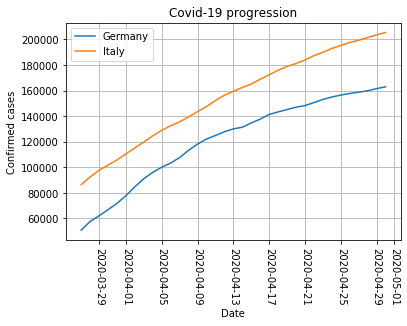

In [41]:
# Now let's see how the confirmed cases curves changed in time
import numpy as np

countries = ['Germany', 'Italy']
plot_progress_data(countries, confirmed_global_df, 'confirmed')

# Cases per day with barplots

In [17]:
# Insert the country of your interest
per_day_country = 'Italy'

In [18]:
confirmed_country = confirmed_global_df[confirmed_global_df['Country/Region'] == per_day_country]
data_per_day_country = []

for i, (_, row) in enumerate(confirmed_country.iterrows()):
    my_dict = {}
    my_dict['Date'] = row['Date']    
    
    # If this is the first day, just get its data
    if i == 0:           
        my_dict['ConfirmedCases'] = row['ConfirmedCases']
        my_dict['Fatalities'] = row['Fatalities']        
    else:
        data_day_before = confirmed_country.iloc[i-1]    
        my_dict['ConfirmedCases'] = row['ConfirmedCases'] - data_day_before['ConfirmedCases']
        my_dict['Fatalities'] = row['Fatalities'] - data_day_before['Fatalities']        
    data_per_day_country.append(my_dict)
    
df_day_by_day = pd.DataFrame(data_per_day_country)

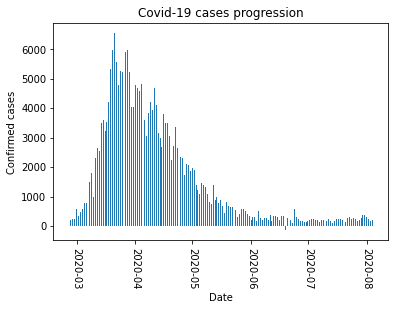

In [19]:
plt.xlabel("Date")
plt.ylabel("Confirmed cases")
plt.title("Covid-19 cases progression")
_ = plt.xticks(rotation=270, fontsize = 10)
_ = plt.bar(df_day_by_day.loc[35:, 'Date'], df_day_by_day.loc[35:, 'ConfirmedCases'], width=0.5)

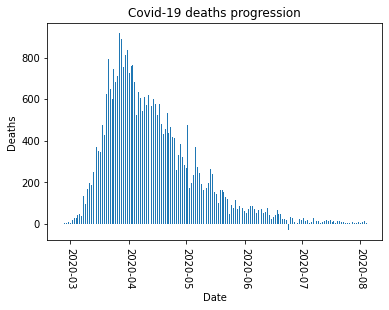

In [20]:
plt.xlabel("Date")
plt.ylabel("Deaths")
plt.title("Covid-19 deaths progression")
_ = plt.xticks(rotation=270, fontsize = 10)
_ = plt.bar(df_day_by_day.loc[35:, 'Date'], df_day_by_day.loc[35:, 'Fatalities'], width=0.5)